# Homework of "Data Mining"
# Boston Housing

### Name：階戸弾
### Student ID number：1224525046

In [2]:
# %matplotlib inline
%matplotlib nbagg
import numpy as np
import numpy.linalg as la
import numpy.random as rd
from numpy.linalg import svd

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn import linear_model, preprocessing
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

# Dataset: Boston Housing

In [3]:
# The dataset is available from the internet.
#
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
#                 'housing/housing.data',
#                 header=None,
#                 sep='\s+')

# Load data from the local file
df = pd.read_csv('./data/boston_housing/housing.csv', header=None, sep='\s+')

# Feature names
fea_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Features (covariates)
X_train = np.array(df.iloc[:,0:13])
# Objective variable (MEDV:)
y_train = np.array(df.iloc[:,13])

# Standarlization
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)


# Display the first 6 rows
df.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


# Homework

## 1. Plot all pair of variables using sns.pairplot. And discuss about relationships between variables.

<IPython.core.display.Javascript object>


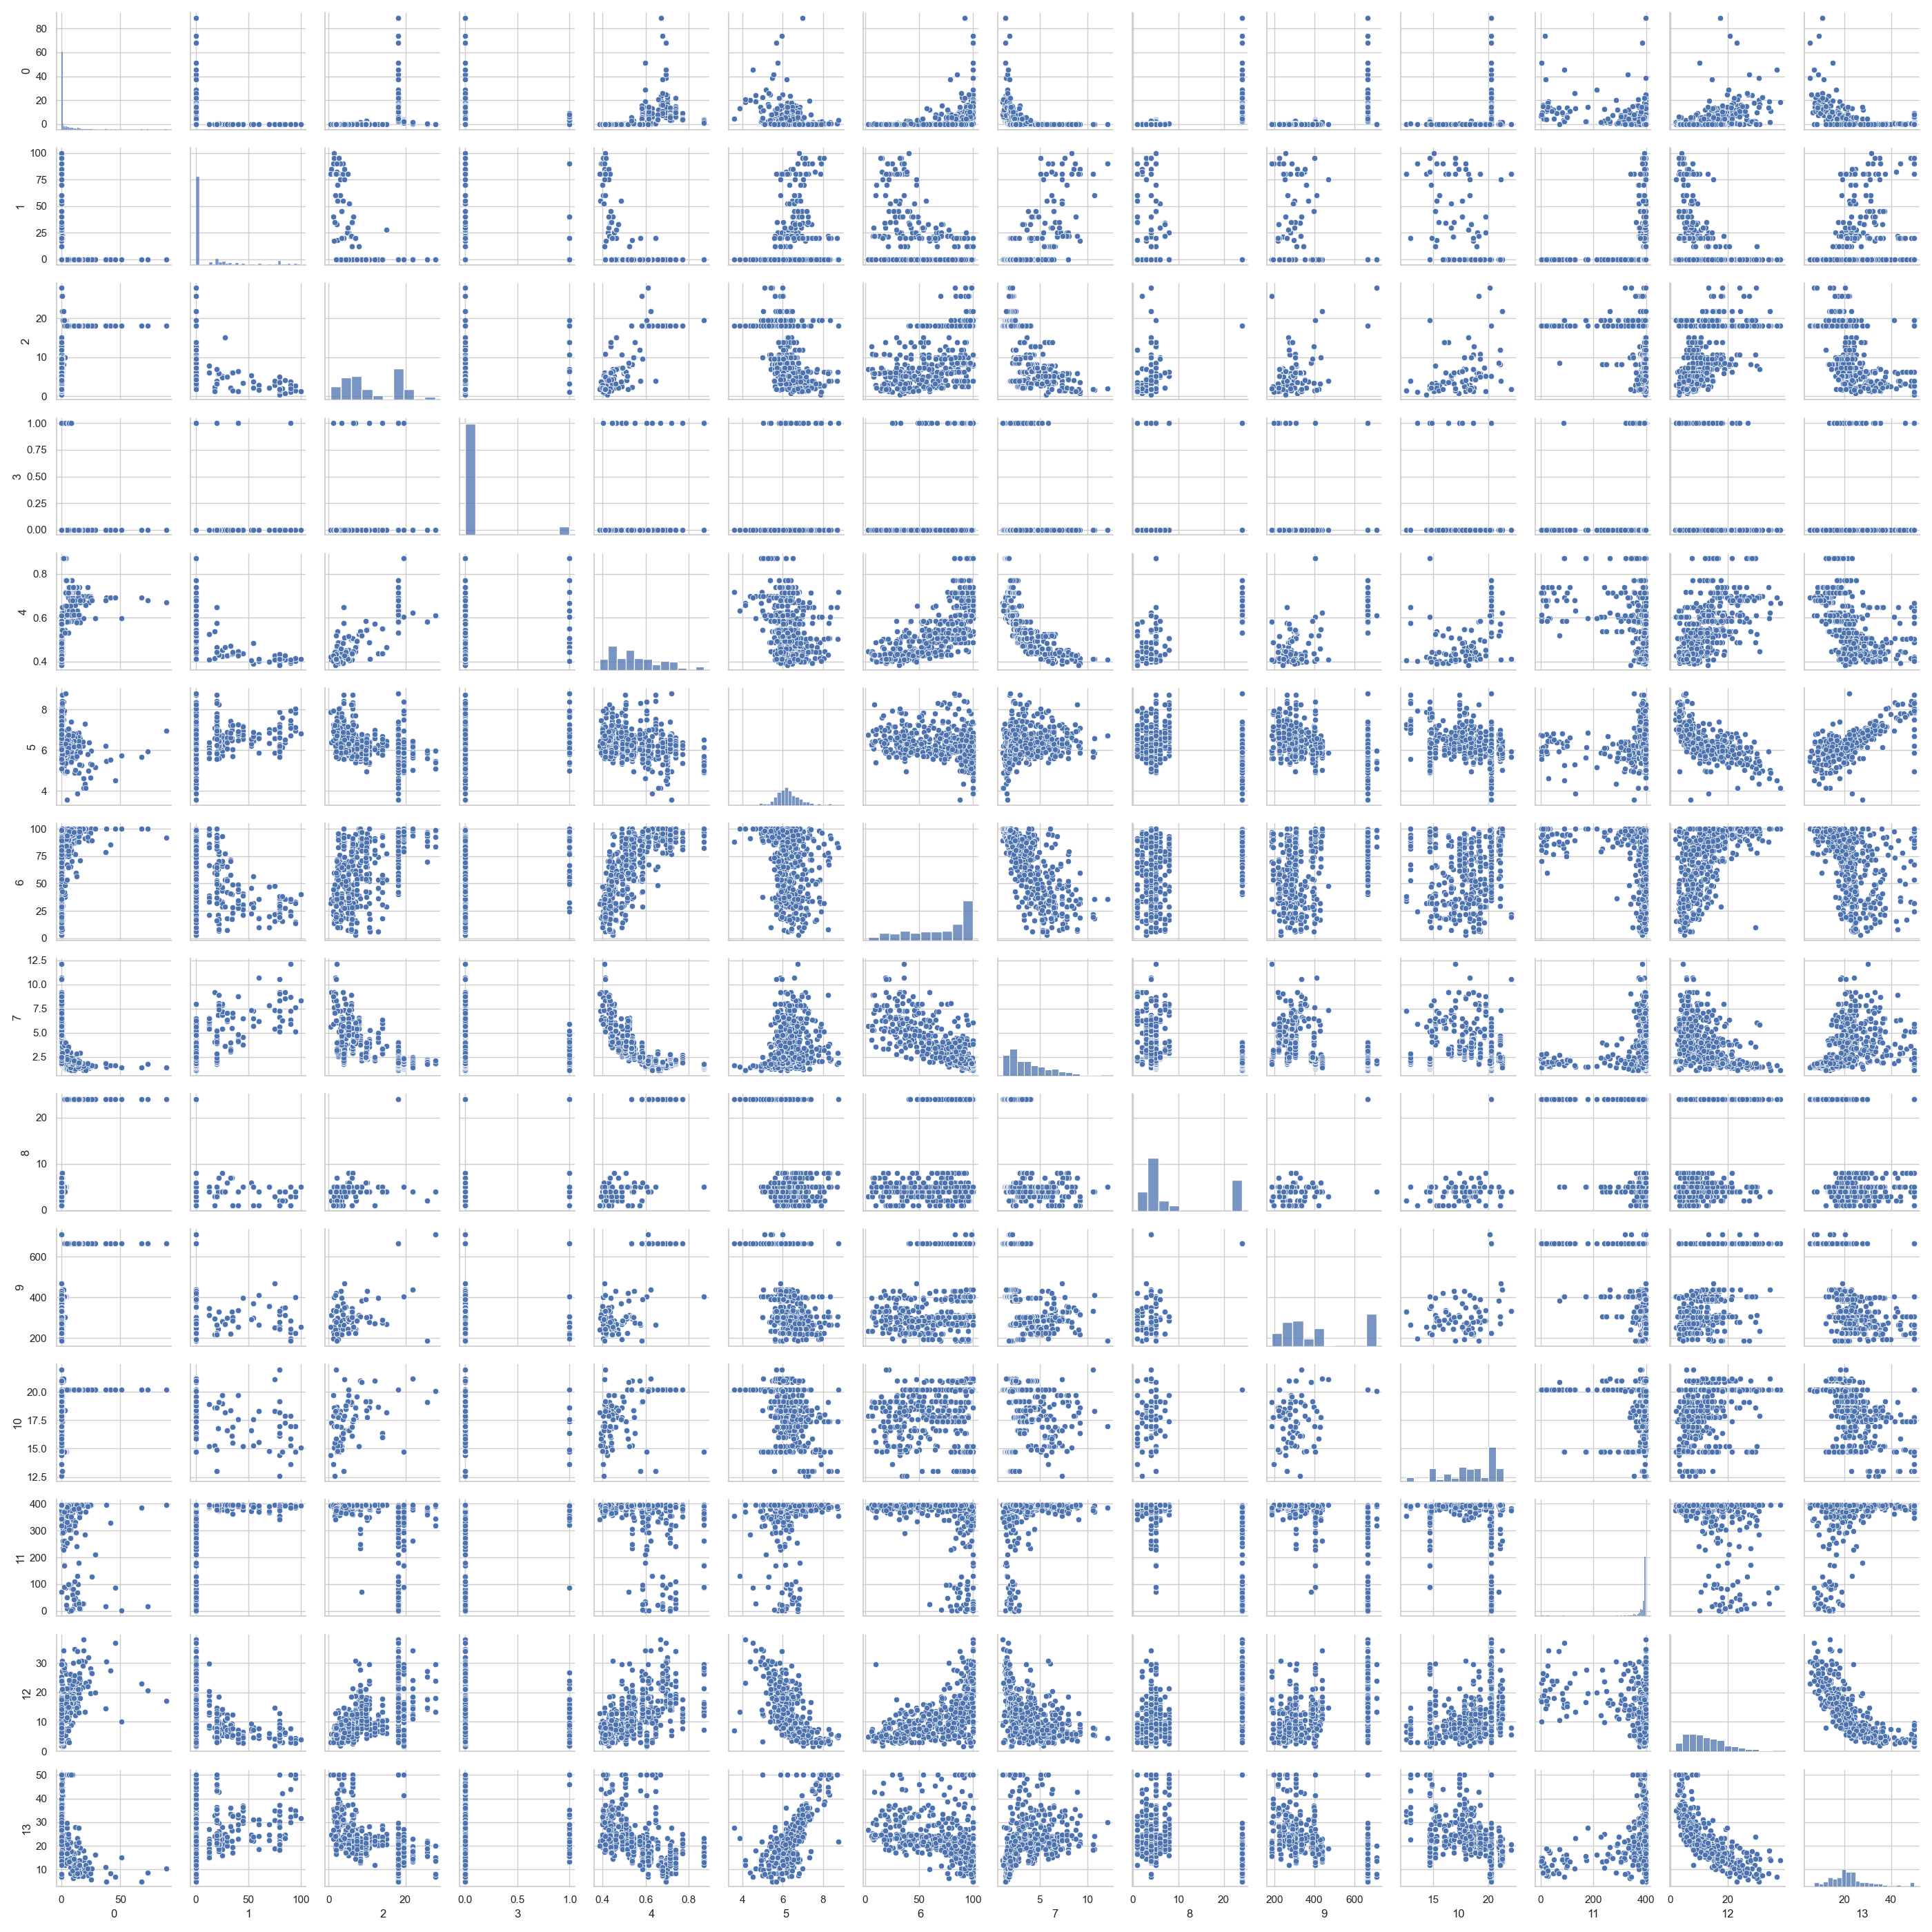

In [4]:
sns.set(style='whitegrid', context='notebook')
cols = df.columns
sns.pairplot(df[cols[:14]], height=2)
plt.tight_layout()
plt.show()

4-7のグラフより，チャールズ側沿いには1940年以前，家屋が建てられていないことが分かる．また，4-6グラフよりチャールズ側沿いの家屋は平均部屋数が多くなっている．つまり，1940年以前に建てられた家屋は平均部屋数が少ないと予測できる．これは6-7,7-6グラフから読み取れ，予測が正しいことが分かる．また，窒素酸化物の割合はアフリカ系アメリカ人居住者の割合と低所得者の割合と相関関係にあることが分かる．アフリカ系アメリカ人の割合が大きければ，窒素酸化物の割合は小さく，低所得者の割合が大きければ窒素酸化物の割合は大きくなっている．

## 2. Analyze the dataset by ridge regression

### (a) Draw a regularization path by ridge regression. 
### (b) Choose the optimal value of the regularization weight by CV (Cross validation). And list the selected features.

(a)


<IPython.core.display.Javascript object>


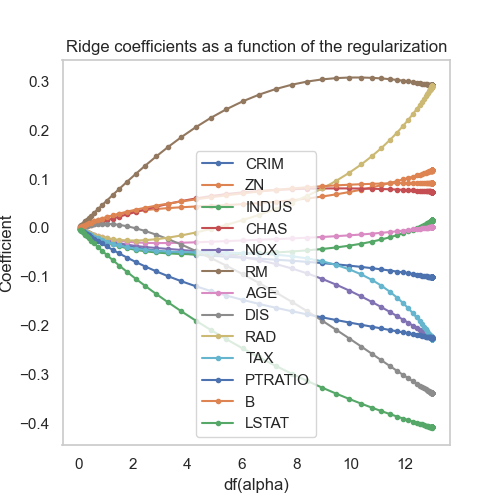

(b)
特徴量
CRIM      -0.074274
ZN         0.068741
INDUS     -0.039710
CHAS       0.080850
NOX       -0.115933
RM         0.306059
AGE       -0.016723
DIS       -0.208134
RAD        0.096528
TAX       -0.075624
PTRATIO   -0.188081
B          0.087017
LSTAT     -0.338485
dtype: float64


In [6]:
model = Ridge()

n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)
coefs = []
df = []  # the degree of freedom
u, s, v = svd(X_train)
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)  # training 
    coefs.append(model.coef_)
    df.append( np.sum(s**2/(s**2+a)) )
coefs = np.array(coefs)

# Cross-Validation to optimize the weight value
model_cv = RidgeCV(alphas=alphas, cv=3)
model_cv.fit(X_train, y_train)
n = np.where(model_cv.alphas == model_cv.alpha_)[0]

# Display the regularization path
print('(a)')
plt.figure(figsize=(5, 5))
for i in range(13):
    plt.plot(df, coefs[:,i], '.-', label=fea_names[i])
plt.xlabel('df(alpha)')
plt.ylabel('Coefficient')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.grid()
plt.legend()
plt.show()
print('(b)')
print('特徴量')
print(pd.Series(model_cv.coef_, index=fea_names))

## 3. Analyze the dataset by Lasso (or LARS)

### (a) Draw a regularization path by ridge regression. 
### (b) Choose the optimal value of the regularization weight by CV. And list the selected features.

(a)


C:\Users\danda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\danda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.87650767937788, tolerance: 0.04051011360167231
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\danda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\danda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.48276257750632,

<IPython.core.display.Javascript object>


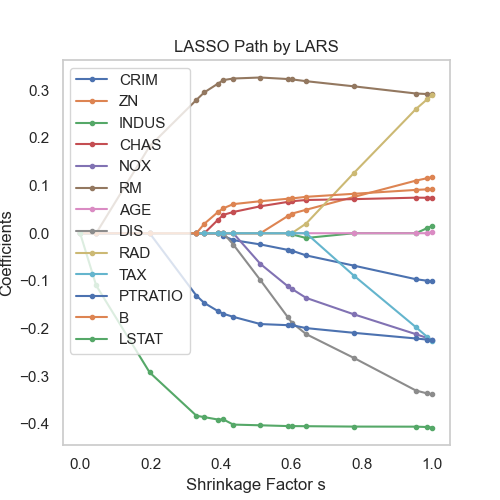

(b)
特徴量
CRIM      -0.068028
ZN         0.076143
INDUS     -0.000032
CHAS       0.071489
NOX       -0.170175
RM         0.308022
AGE       -0.000000
DIS       -0.261719
RAD        0.126419
TAX       -0.089093
PTRATIO   -0.208909
B          0.082726
LSTAT     -0.405537
dtype: float64


In [7]:
model = Lasso()

# Define and training to compute path
alphas, _, coefs = linear_model.lars_path(X_train, y_train, method='lasso')

# Cross-Validation to optimize the weight value
model_cv = LassoCV(alphas=alphas, cv=3)
model_cv.fit(X_train, y_train)
n = np.where(model_cv.alphas == model_cv.alpha_)[0]
# print(model_cv.alpha_)

# Shrinkage factor
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

# Display results
print('(a)')
plt.figure(figsize=(5, 5))
for i in range(13):
    plt.plot(xx, coefs[i,:], '.-', label=fea_names[i])
ymin, ymax = plt.ylim()
plt.xlabel('Shrinkage Factor s')
plt.ylabel('Coefficients')
plt.title('LASSO Path by LARS')
plt.axis('tight')
plt.grid()
plt.legend()
plt.show()

print('(b)')
print('特徴量')
print(pd.Series(model_cv.coef_, index=fea_names))

## 4. Discussion about the models and the analysis result

リッジ回帰はすべての特徴量が選ばれたが、Lasso回帰ではAGEが選ばれなかった。つまりすべての特徴量の中でAGEの影響は小さいと言える。実際にリッジ回帰でのAGEの重みを見ても分かる。リッジ回帰での過学習をLasso回帰ではなくすことができている。